In [31]:
pip install einops

     |████████████████████████████████| 44 kB 3.4 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


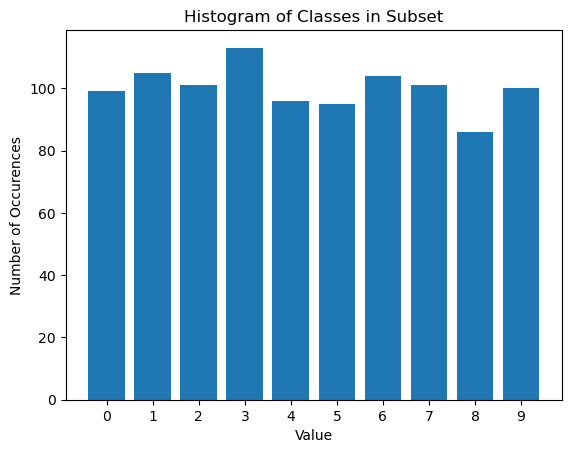

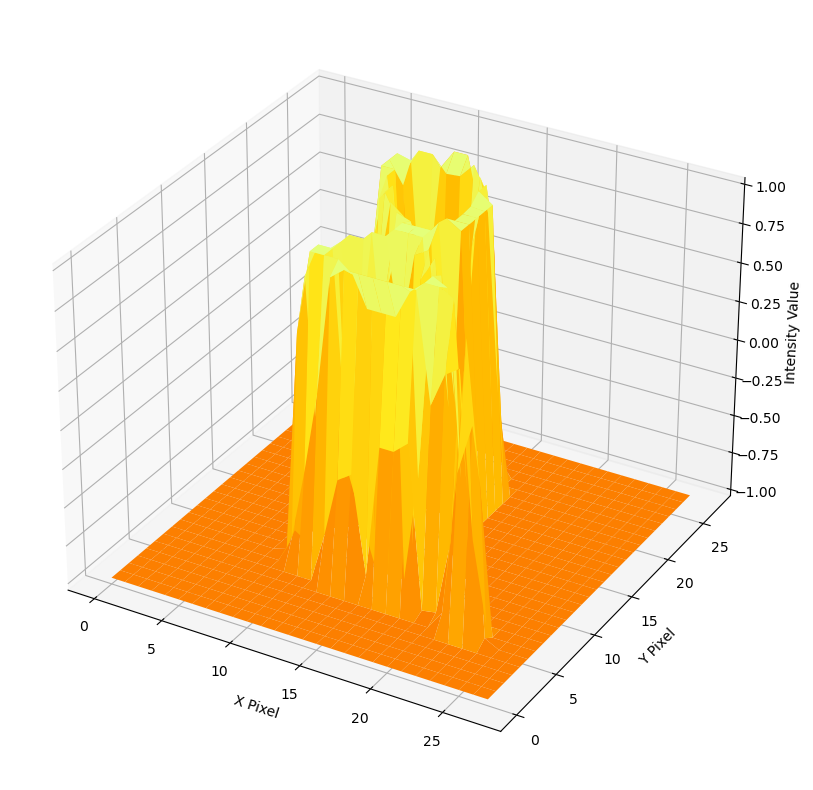

In [57]:
import torchvision
import torch
import torchvision.datasets as datasets
from torchvision.utils import make_grid
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm

from einops import rearrange

import random
from mpl_toolkits.mplot3d import Axes3D

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

subset_indicies = torch.randperm(len(mnist_trainset))[:1000]

subset_data = Subset(mnist_trainset, subset_indicies)

subset_labels = [mnist_trainset[i][1] for i in subset_indicies]

#Histogram Plotting

plt.hist(subset_labels, bins=np.arange(11)-.5, rwidth=0.8)
plt.title('Histogram of Classes in Subset')
plt.xlabel('Value')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(10))
plt.show()

images, ___ = next(iter(DataLoader(subset_data, batch_size=1000)))

batched_images = rearrange(images, '(b1 b2) c h w -> b1 b2 c h w', b2=25)

idx = random.randint(0, len(images)-1)
image = images[idx].squeeze()

#3D Plotting

#pixel grid
x = np.arange(0, 28, 1)
y = np.arange(0, 28, 1)
x2, y2 = np.meshgrid(x, y)

z = image.numpy() 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x2, y2, z, cmap='Wistia_r')

ax.set_xlabel('X Pixel')
ax.set_ylabel('Y Pixel')
ax.set_zlabel('Intensity Value')

plt.show()


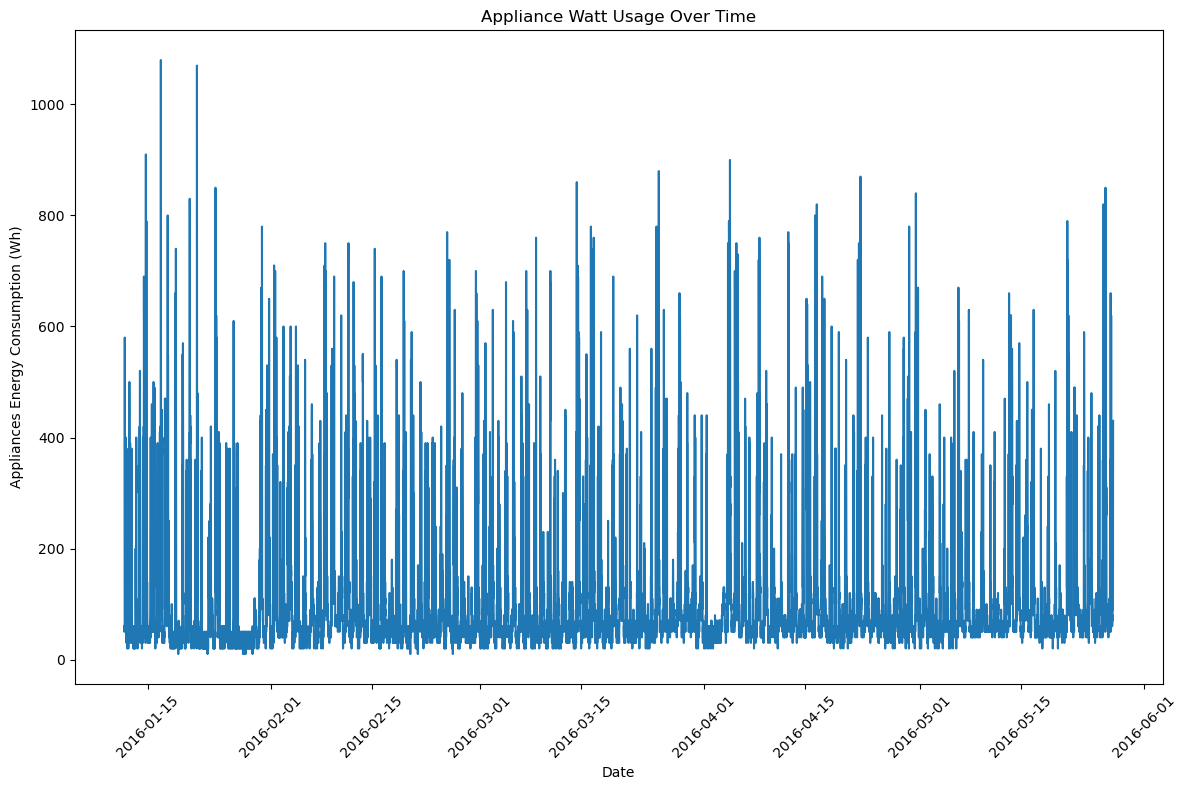

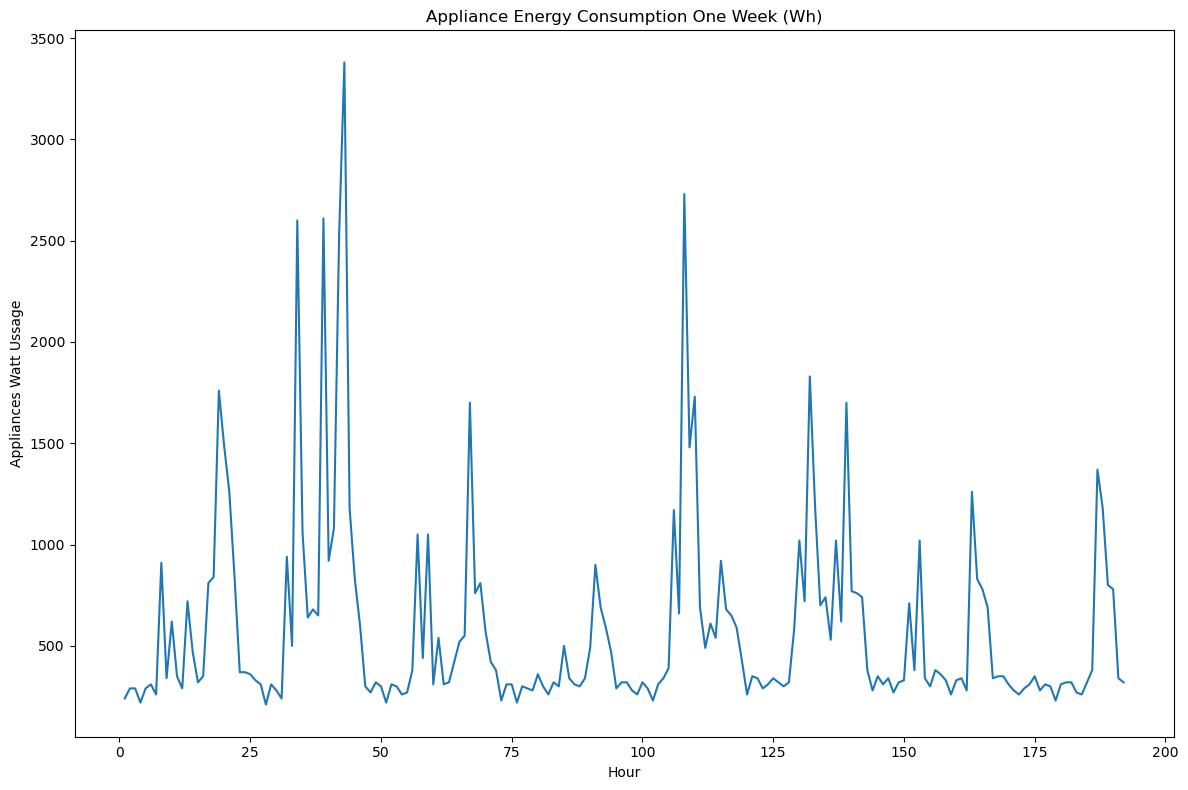

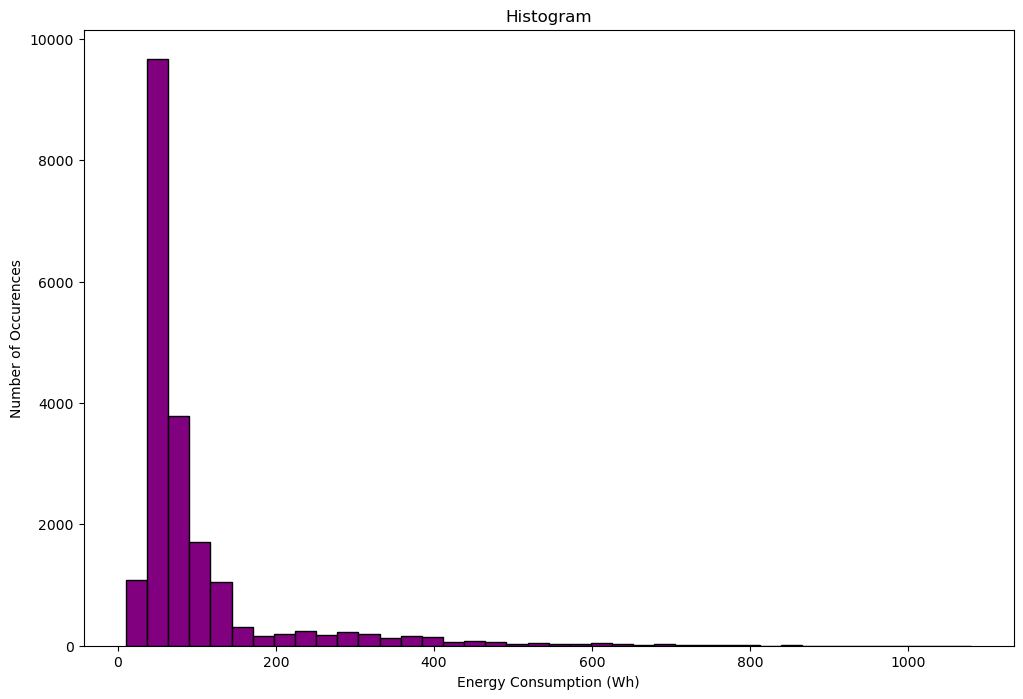

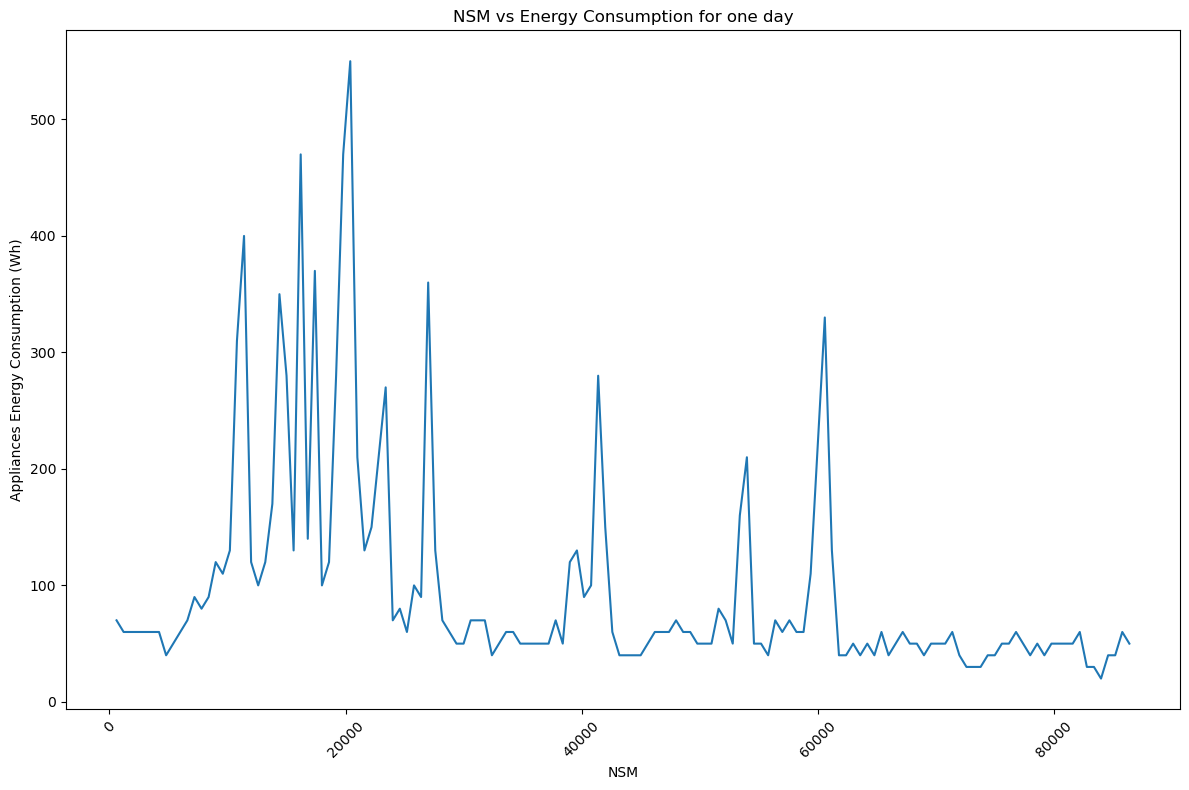

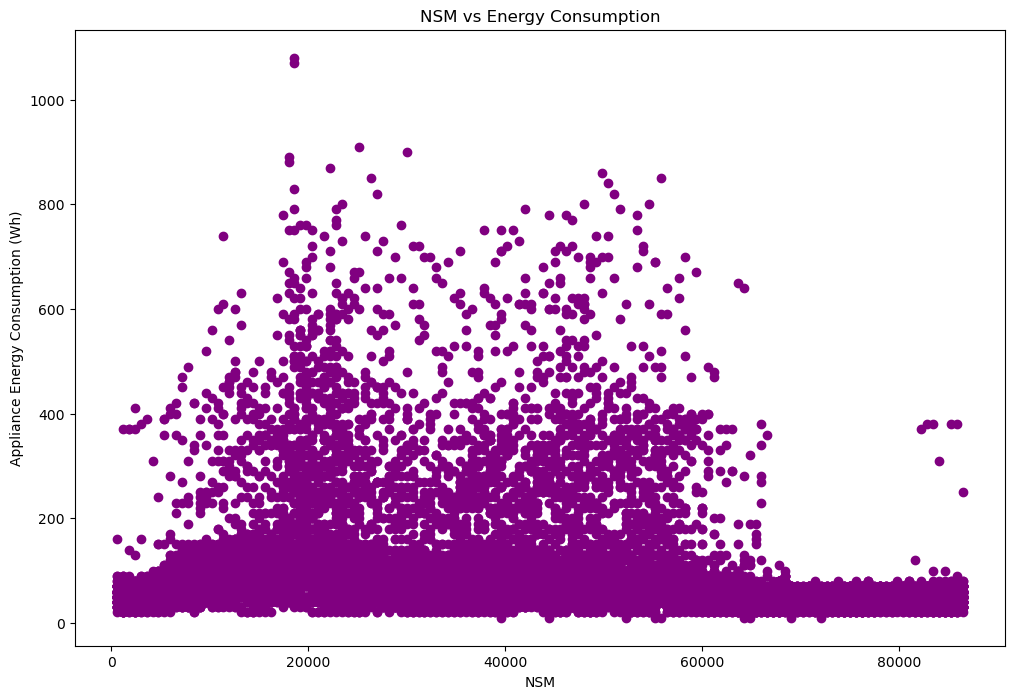

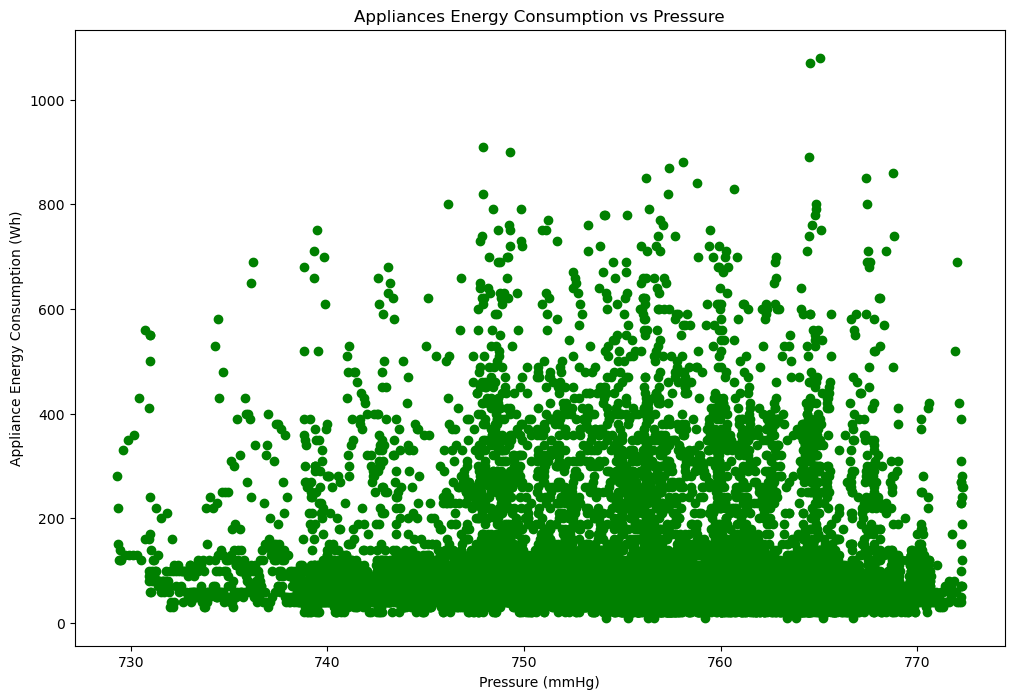

It appears that the two major features contributing to energy consumption are NSM and the pressure. NSM makes the most senese since as people usually are in bed by midnight they are not using their appliances and as such there is less energy consumption. Pressure could be caused by items such as the AC having to work harder to move the air around if there is a pressure difference from inside and outside the building


In [151]:
import pandas as pd

df = pd.read_csv('data/energydata_complete.csv', parse_dates=['date'], index_col='date')

#Plot entire time

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Appliances'], marker='', linestyle='-', label='Appliances')
plt.title('Appliance Watt Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot specific week (arbitrary)

week = df.loc['2016-03-15':'2016-03-22']
hourly = week.resample('1H').sum()
hour_val = range(1,len(hourly)+1)

plt.figure(figsize=(12, 8))
plt.plot(hour_val, hourly['Appliances'], marker='', linestyle='-', label='Appliances')
plt.title('Appliance Energy Consumption One Week (Wh)') 
plt.xlabel('Hour')
plt.ylabel('Appliances Watt Ussage')
plt.tight_layout()
plt.show()

#Histogram Time

df['Appliances'].hist(bins=40, figsize=(12, 8), color='purple', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Number of Occurences')
plt.grid(False)
plt.show()

#Seconds to midnight AAAAAAAAAAA
#Seconds in a day - # of seconds ellapsed

day = df.loc['2016-03-15'].copy()
day['NSM'] = 86400-(day.index.hour*3600+day.index.minute*60+day.index.second) 

plt.figure(figsize=(12, 8))
plt.plot(day['NSM'], day['Appliances'], marker='', linestyle='-', label='Appliances')
plt.title('NSM vs Energy Consumption for one day')
plt.xlabel('NSM')
plt.ylabel('Appliances Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Variation scatterplot
df['NSM'] = 86400-(df.index.hour*3600+df.index.minute*60+df.index.second)

plt.figure(figsize=(12,8))
plt.scatter(df['NSM'], df['Appliances'], color='purple')
plt.title('NSM vs Energy Consumption')
plt.xlabel('NSM')
plt.ylabel('Appliance Energy Consumption (Wh)')
plt.show()


#Pressure vs Whatever

plt.figure(figsize=(12,8))
plt.scatter(df['Press_mm_hg'], df['Appliances'], color = 'green')
plt.title('Appliances Energy Consumption vs Pressure')
plt.ylabel('Appliance Energy Consumption (Wh)')
plt.xlabel('Pressure (mmHg)')
plt.show()

#Comments
print('It appears that the two major features contributing to energy consumption are NSM and the pressure. NSM makes the most senese since as people usually are in bed by midnight they are not using their appliances and as such there is less energy consumption. Pressure could be caused by items such as the AC having to work harder to move the air around if there is a pressure difference from inside and outside the building')


In [163]:

columns = ['Frequency','AoT','Chord','Vel','thickness', 'decibels']
df = pd.read_csv('data/airfoil_self_noise.dat',sep='\t', header = None, names = columns)

#Mean
average_Frequency = df['Frequency'].mean()
average_AoT = df['AoT'].mean()
average_Chord = df['Chord'].mean()
average_Vel = df['Vel'].mean()
average_thickness = df['thickness'].mean()
average_decibels = df['decibels'].mean()

print("Average Frequency " + str(average_Frequency))
print("Average Angle of Attack " + str(average_AoT))
print("Average Chord Length " + str(average_Chord))
print("Average Velocity " + str(average_Vel))
print("Average Thickness " + str(average_thickness))
print("Average decibels " + str(average_decibels))
print(" ")

#Variance
variance_Frequency = df['Frequency'].var()
variance_AoT = df['AoT'].var()
variance_Chord = df['Chord'].var()
variance_Vel = df['Vel'].var()
variance_thickness = df['thickness'].var()
variance_decibels = df['decibels'].var()

print("Variance Frequency " + str(variance_Frequency))
print("Variance Angle of Attack " + str(variance_AoT))
print("Variance Chord Length " + str(variance_Chord))
print("Variance Velocity " + str(variance_Vel))
print("Variance Thickness " + str(variance_thickness))
print("Variance decibels " + str(variance_decibels))
print(" ")

#Median
median_Frequency = df['Frequency'].median()
median_AoT = df['AoT'].median()
median_Chord = df['Chord'].median()
median_Vel = df['Vel'].median()
median_thickness = df['thickness'].median()
median_decibels = df['decibels'].median()

print("Median Frequency " + str(median_Frequency))
print("Median Angle of Attack " + str(median_AoT))
print("Median Chord Length " + str(median_Chord))
print("Median Velocity " + str(median_Vel))
print("Median Thickness " + str(median_thickness))
print("Median decibels " + str(median_decibels))
print(" ")

#Kurtosis (what is this again?)
kurtosis_Frequency = df['Frequency'].kurtosis()
kurtosis_AoT = df['AoT'].kurtosis()
kurtosis_Chord = df['Chord'].kurtosis()
kurtosis_Vel = df['Vel'].kurtosis()
kurtosis_thickness = df['thickness'].kurtosis()
kurtosis_decibels = df['decibels'].kurtosis()

print("Kurtosis Frequency " + str(kurtosis_Frequency))
print("Kurtosis Angle of Attack " + str(kurtosis_AoT))
print("Kurtosis Chord Length " + str(kurtosis_Chord))
print("Kurtosis Velocity " + str(kurtosis_Vel))
print("Kurtosis Thickness " + str(kurtosis_thickness))
print("Kurtosis decibels " + str(kurtosis_decibels))
print(" ")


#Skewness
skew_Frequency = df['Frequency'].skew()
skew_AoT = df['AoT'].skew()
skew_Chord = df['Chord'].skew()
skew_Vel = df['Vel'].skew()
skew_thickness = df['thickness'].skew()
skew_decibels = df['decibels'].skew()

print("Skew Frequency " + str(skew_Frequency))
print("Skew Angle of Attack " + str(skew_AoT))
print("Skew Chord Length " + str(skew_Chord))
print("Skew Velocity " + str(skew_Vel))
print("Skew Thickness " + str(skew_thickness))
print("Skew decibels " + str(skew_decibels))
print(" ")


#Range
range_Frequency = df['Frequency'].max() - df['Frequency'].min()
range_AoT = df['AoT'].max() - df['AoT'].min()
range_Chord = df['Chord'].max() - df['Chord'].min()
range_Vel = df['Vel'].max() - df['Vel'].min()
range_thickness = df['thickness'].max() - df['thickness'].min()
range_decibels = df['decibels'].max() - df['decibels'].min()

print("Range Frequency " + str(range_Frequency))
print("Range Angle of Attack " + str(range_AoT))
print("Range Chord Length " + str(range_Chord))
print("Range Velocity " + str(range_Vel))
print("Range Thickness " + str(range_thickness))
print("Range decibels " + str(range_decibels))
print(" ")



Average Frequency 2886.3805721889553
Average Angle of Attack 6.782302062541517
Average Chord Length 0.13654823685961226
Average Velocity 50.860745176314175
Average Thickness 0.011139880391217556
Average decibels 124.83594278110434
 
Variance Frequency 9938717.383696929
Variance Angle of Attack 35.02424050257195
Variance Chord Length 0.008749867864732185
Variance Velocity 242.5116138251704
Variance Thickness 0.0001729286612721097
Variance decibels 47.59146318314189
 
Median Frequency 1600.0
Median Angle of Attack 5.4
Median Chord Length 0.1016
Median Velocity 39.6
Median Thickness 0.00495741
Median decibels 125.721
 
Kurtosis Frequency 5.708685076629566
Kurtosis Angle of Attack -0.4129507932946681
Kurtosis Chord Length -1.037964096539102
Kurtosis Velocity -1.5639512742591497
Kurtosis Thickness 2.218903124436665
Kurtosis decibels -0.31418730019313834
 
Skew Frequency 2.1370843370561032
Skew Angle of Attack 0.6891644015246552
Skew Chord Length 0.4574574796795428
Skew Velocity 0.2358524141